기존 Dataset 코드에서

```python
np.save('D:/git/LipService/x_save', x_data) # x_save.npy
np.save('D:/git/LipService/y_data', y_data) # y_data.npy
```

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras import models, layers, activations
from keras.layers import Conv2D, TimeDistributed, BatchNormalization, MaxPooling2D, Flatten, Bidirectional, Dense,Dropout,Flatten

In [2]:
x_data = np.load('D:/git/LipService/x_save.npy') # x_save.npy
y_data = np.load('D:/git/LipService/y_data.npy') # y_data.npy
y_data = keras.utils.to_categorical(y_data,16)
print(x_data.shape, y_data.shape)

(300, 20, 64, 64, 3) (300, 16)


In [3]:
# Train과 Test 분리
X_train, X_test, Y_train, Y_test = train_test_split(x_data, y_data, test_size = 0.2, shuffle = True, stratify=y_data)
print("x_train: {}, X_test: {}".format(X_train.shape, X_test.shape))
print("Y_train: {}, Y_test: {}".format(Y_train.shape, Y_test.shape))

x_train: (240, 20, 64, 64, 3), X_test: (60, 20, 64, 64, 3)
Y_train: (240, 16), Y_test: (60, 16)


In [4]:
class deep_CNN_LSTM(keras.Model):
    def __init__(self, num_classes):
        super(deep_CNN_LSTM, self).__init__()
        self.conv1 = TimeDistributed(Conv2D(32, kernel_size=(5,5), activation = 'relu'))
        self.conv2 = TimeDistributed(Conv2D(32, kernel_size=(5,5), activation = 'relu'))
        self.conv3 = TimeDistributed(Conv2D(128, kernel_size=(5,5), activation = 'relu'))
        
        self.bilstm = layers.Bidirectional(layers.LSTM(256), merge_mode = 'concat')
        self.dense = layers.Dense(num_classes, activation = 'softmax')
        self.max_pool= TimeDistributed(MaxPooling2D(pool_size= (2,2)))
        self.dropout = layers.Dropout(0.2)
        self.flat= TimeDistributed(Flatten())
        
    def call(self, x):
        #x = self.dropout(BatchNormalization()(self.conv1(x)))
        #x = self.dropout(BatchNormalization()(self.conv2(x)))
        #x = self.dropout(BatchNormalization()(self.conv3(x)))
        
        x = self.max_pool(self.dropout(BatchNormalization()(self.conv1(x))))
        #x = self.max_pool(self.dropout(BatchNormalization()(self.conv2(x))))
        #x = self.max_pool(self.dropout(BatchNormalization()(self.conv3(x))))
        x = self.flat(x)
        x = self.bilstm(x)
        return self.dense(x)

In [5]:
def get_model():
    return deep_CNN_LSTM(num_classes = 16)
#def get_model():
#    return VGG_LSTM(num_classes = 16)

In [6]:
tf.config.experimental_run_functions_eagerly(True)

Instructions for updating:
Use `tf.config.run_functions_eagerly` instead of the experimental version.


In [7]:
model = get_model()
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(X_train, Y_train, batch_size=16, epochs=5, verbose = 1, validation_data = (X_test, Y_test))
#model.summary()

C:\Users\hwj43\anaconda3\envs\JolpJJang\lib\site-packages\tensorflow\python\data\ops\dataset_ops.py:3503: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  warnings.warn(


Epoch 1/5
15/15 [==============================] - 72s 5s/step - loss: 1.7533 - accuracy: 0.3176 - val_loss: 1.9224 - val_accuracy: 0.3333
Epoch 2/5
15/15 [==============================] - 75s 5s/step - loss: 1.0866 - accuracy: 0.3218 - val_loss: 2.1213 - val_accuracy: 0.3333
Epoch 3/5
15/15 [==============================] - 74s 5s/step - loss: 1.0358 - accuracy: 0.4078 - val_loss: 2.1357 - val_accuracy: 0.3333
Epoch 4/5
15/15 [==============================] - 73s 5s/step - loss: 1.0062 - accuracy: 0.4484 - val_loss: 2.2804 - val_accuracy: 0.3333
Epoch 5/5
15/15 [==============================] - 73s 5s/step - loss: 0.9926 - accuracy: 0.4930 - val_loss: 2.1756 - val_accuracy: 0.3333


In [8]:
history.history

{'loss': [1.3797569274902344,
  1.0851168632507324,
  1.0621267557144165,
  1.0314115285873413,
  0.9942508339881897],
 'accuracy': [0.3541666567325592,
  0.34166666865348816,
  0.38333332538604736,
  0.4166666567325592,
  0.49166667461395264],
 'val_loss': [1.9223592281341553,
  2.121258497238159,
  2.13565993309021,
  2.2804179191589355,
  2.175640344619751],
 'val_accuracy': [0.3333333432674408,
  0.3333333432674408,
  0.3333333432674408,
  0.3333333432674408,
  0.3333333432674408]}

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


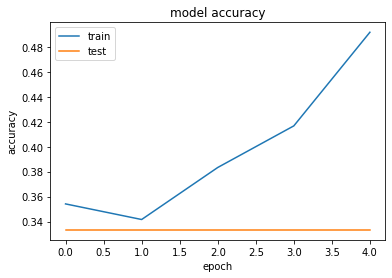

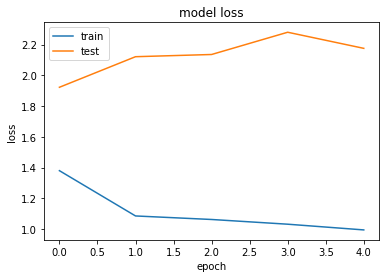

In [11]:
import matplotlib.pyplot as plt
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()